# CEE 498: Transportation Economics
## Assignment One
### Noah Garfinkle (garfink2@illinois edu)
### 05 February 2020

## 0. References and Works Cited

|Link|Notes|
|---|---|
|https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.lognorm.html|Scipy Lognormal Distribution|
|https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.logistic.html|Scipy Logistic Distribution|

# Notes on running this notebook

All code has been developed and tested using Python 3.7.3 running on Windows 10.  All evaluations and any references to runtime were completed on Windows 10 utilizing either a laptop (i5-6300u CPU rated at 2.5 GHz and with 8 Gb of RAM) or on a desktop (i7-4770k CPU rated at 3.5 GHz with 32 Gb of RAM).

# Imports and Config

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import logistic, lognorm
from scipy import integrate
from ipypb import track

# Problem 3

In [2]:
c = 1.0
α1 = 10.0
α2 = 5.0
β1 = 2.0
β2 = 1.25

In [3]:
def q(p,α,β):
    demand = α-β*p
    demand = np.max([demand,0])
    return demand

In [4]:
Ps = np.linspace(0,10,100)

In [5]:
q1 = [q(P,α1,β1) for P in Ps]

In [6]:
q2 = [q(P,α2,β2) for P in Ps]

Problem 3a.

In [7]:
C=0.3

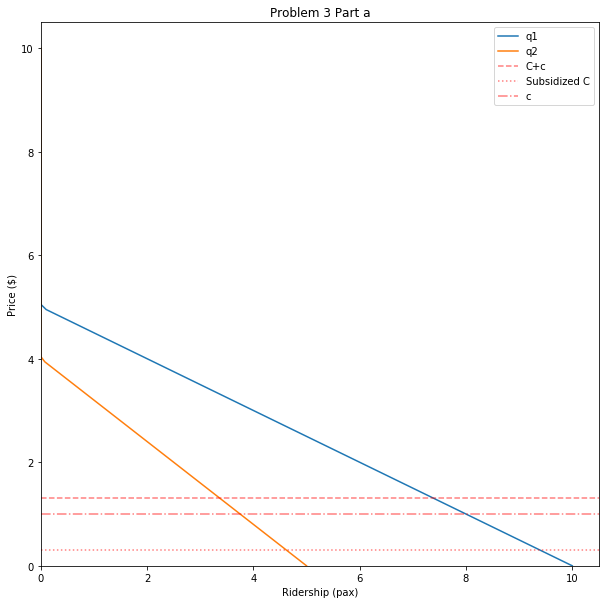

In [8]:
fig,ax = plt.subplots(figsize=(10,10))
# y axis is price
# x axis is demand
ax.plot(q1,Ps,label="q1")
ax.plot(q2,Ps,label="q2")
ax.set_ylabel("Price ($)")
ax.set_xlabel("Ridership (pax)")
ax.set_title("Problem 3 Part a")

ax.axhline(1.3,label="C+c",ls="--",alpha=0.5,color="red")
ax.axhline(0.3,label="Subsidized C",ls=":",alpha=0.5,color="red")
ax.axhline(1.0,label="c",ls="-.",alpha=0.5,color="red")

ax.set_xlim(left=0)
ax.set_ylim(bottom=0)

ax.legend()


Problem 3b.

In [9]:
C=3

In [10]:
def p(q,α,β):
    price = (α-q)/β
    if price < 0.0:
        price = 0.0
    return price

In [11]:
qs = np.linspace(0,20,100)

In [12]:
p1 = [p(q,α1,β1) for q in qs]

In [13]:
p2 = [p(q,α2,β2) for q in qs]

In [14]:
pt = [p(q,α1,β1) + p(q,α2,β2) for q in qs]

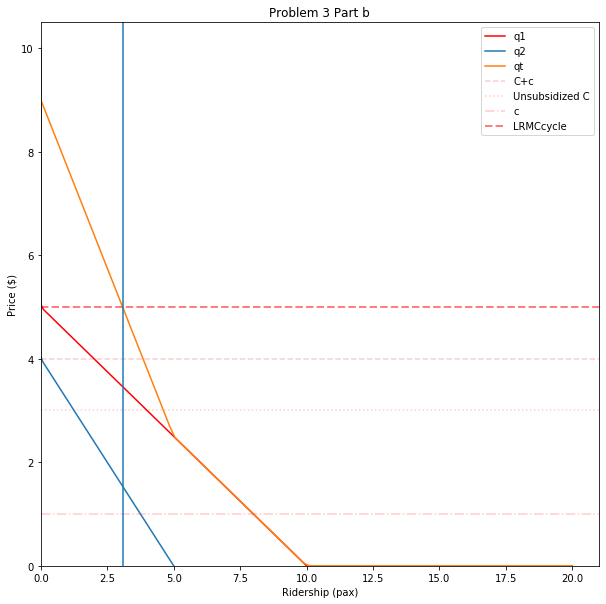

In [15]:
fig,ax = plt.subplots(figsize=(10,10))
# y axis is price
# x axis is demand
ax.plot(q1,Ps,label="q1",color='red')
ax.plot(q2,Ps,label="q2")
ax.plot(qs,pt,label="qt")
ax.set_ylabel("Price ($)")
ax.set_xlabel("Ridership (pax)")
ax.set_title("Problem 3 Part b")

ax.axhline(4.0,label="C+c",ls="--",alpha=0.2,color="red")
ax.axhline(3.0,label="Unsubsidized C",ls=":",alpha=0.2,color="red")
ax.axhline(1.0,label="c",ls="-.",alpha=0.2,color="red")
ax.axhline(5,label="LRMCcycle",ls="--",alpha=0.5,color='red',lw=2)

ax.axvline(3.08)

ax.set_xlim(left=0)
ax.set_ylim(bottom=0)

ax.legend()


Solve for the values of intersects between the three demand curves and k*

In [16]:
slopeWhereIntersect = (pt[0]-pt[1])/(qs[0]-qs[1])

In [17]:
slopeWhereIntersect

-1.3000000000000018

In [18]:
startingPoint = pt[0]
print(startingPoint)

9.0


In [19]:
# 9-1.3x=5 therefore 4=1.3x, x = 4/1.3

In [20]:
# solve for kstar
kstar = 4/1.3
print(kstar)

3.0769230769230766


In [21]:
# solve for p1 and p2
p1soln = p(kstar,α1,β1)
p2soln = p(kstar,α2,β2)
print(f"p1: {p1soln}, p2: {p2soln}")

p1: 3.4615384615384617, p2: 1.5384615384615388


# Problem 4

In [22]:
λ = 500 # pax
# L is the trip length in (km)
# V is the gross benefit in $

In [23]:
# distribution of trip length is lognormally distributed
# with scale parameter of 0.5 and shape parameter of 1

In [24]:
L = lognorm(s=1.0,scale=0.5)

Text(0, 0.5, 'P(L<l)')

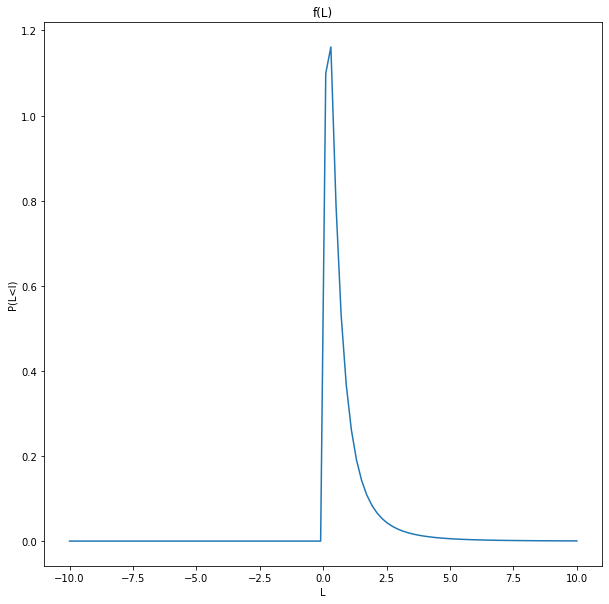

In [25]:
x = np.linspace(-10,10, 100)
fig,ax = plt.subplots(figsize=(10,10))
ax.plot(x, L.pdf(x))
ax.set_title("f(L)")
ax.set_xlabel("L")
ax.set_ylabel("P(L<l)")

In [26]:
# Gross benefit is dsitributed with logistic distribution with
# location parameter 1.5

In [27]:
V = logistic(loc=1.5)

Text(0, 0.5, 'P(V<v)')

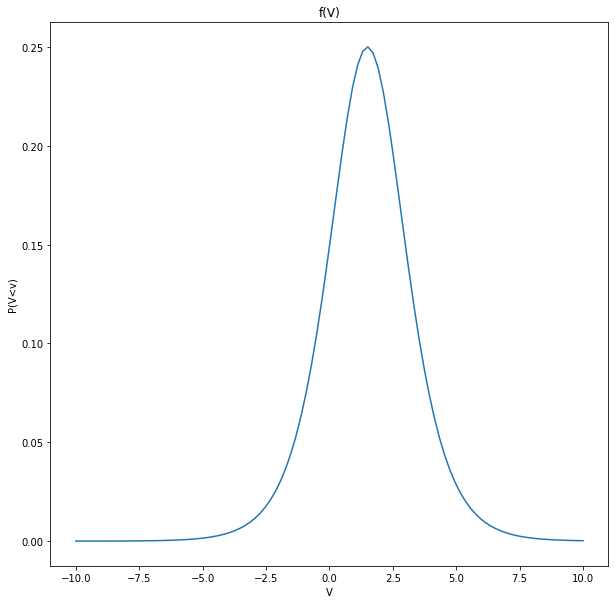

In [28]:
x = np.linspace(-10,10, 100)
fig,ax = plt.subplots(figsize=(10,10))
ax.plot(x, V.pdf(x))
ax.set_title("f(V)")
ax.set_xlabel("V")
ax.set_ylabel("P(V<v)")

In [29]:
ps = np.linspace(0.1,1,20)

In [30]:
f = lambda v,l: V.pdf(v)*L.pdf(l)

In [34]:
results = []
for p in track(ps):
    result = integrate.dblquad(f,0,np.inf,lambda l:p*l, lambda l:np.inf)[0] * λ
    results.append(result)

 [████████████████████████████████████████████████████████████] 20/20 [02:19<00:06, 6.97s/it]

Text(0.5, 0, 'Demand (pax)')

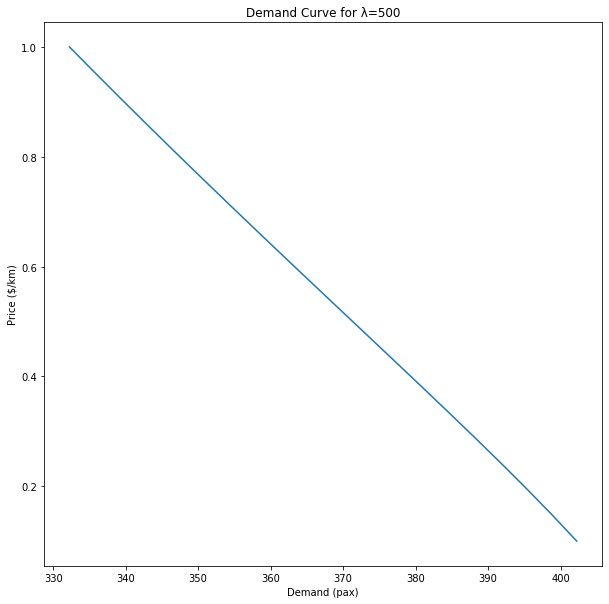

In [36]:
fig,ax = plt.subplots(figsize=(10,10))
ax.plot(results,ps,label="demand curve")
ax.set_title("Demand Curve for λ=500")
ax.set_ylabel("Price ($/km)")
ax.set_xlabel("Demand (pax)")